# Naive Bayes — Bernoulli
# Resample — SMOTE
### Import Libraries

conda install -c glemaitre imbalanced-learn 


conda update scikit-learn

In [1]:
from sklearn import __version__ 
print('The scikit-learn version is {}.'.format(__version__))

The scikit-learn version is 0.19.1.


In [2]:
import pandas as pd, numpy as np #basic package

from scipy import stats
from sklearn import preprocessing

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GMM

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, precision_score, log_loss, confusion_matrix

from sklearn.utils import resample # resample

from imblearn.over_sampling import SMOTE

from matplotlib import pyplot as plt


## Import Data and Define Global Variables

In [3]:
df = pd.read_csv("pp_df1.csv", index_col = 0)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Resample

In [4]:
pd.Series(y).value_counts()

0    90409
1    11357
Name: readmitted_tran, dtype: int64

# SMOTE

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [6]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [7]:
pd.Series(y_train).value_counts()

1    63304
0    63304
dtype: int64

In [8]:
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(X_train)

plt.scatter(X.iloc[:,0], X.iloc[:, 1], s = 1)

centers = np.empty(shape=(gmm.n_components, X.shape[1]))

# Centroids

In [9]:
Centroids = pd.DataFrame(centers)

In [10]:
Centroids.columns = X.columns

In [11]:
np.log(Centroids)

/Users/MatiasBerretta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,diag_1,diag_2,diag_3,0,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Female,...,No.17,Yes,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,-inf,-214.668631,-inf,-214.668631,-214.668631,-214.668631,-214.668631,-214.668631,-214.668631,-214.668631,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-229.995143,-229.995143,-229.995143,-229.995143,-229.995143,-229.995143,-229.995143,-229.995143,-229.995143,-229.995143


### Save centroids to csv
Centroids.to_csv("Centroids_GMM.csv")

In [12]:
for i in range(gmm.n_components):
    density = stats.multivariate_normal(cov=gmm.covariances_[i], mean=gmm.means_[i],  allow_singular=True).logpdf(X_train)
    centers[i, :] = X_train[np.argmax(density)]

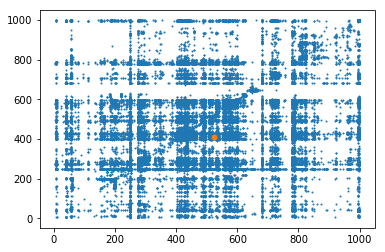

In [13]:
plt.scatter(centers[:, 0], centers[:, 1], s=20)
plt.show()